
### Problem Statement:

About Company:

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

Problem:

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.


### Import libraries 

In [9]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Read train dataset and test dataset

In [10]:
train_data = pd.read_csv('train_ctrUa4K.csv')
test_data = pd.read_csv('test_lAUu6dG.csv')


In [11]:
test_data1 = test_data.copy()

## First 5 rows of the train datasets

In [12]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Class Distribution

In [13]:
train_data["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [14]:
# To get the top 5 records of test
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [15]:
# To get the dimensions of train data
train_data.shape

(614, 13)

In [16]:
# To get the dimensions of test data
test_data.shape

(367, 12)

In [17]:
#removing duplicates from train data
train_data.drop_duplicates(keep='first', inplace=True)
train_data.shape

(614, 13)

In [18]:
#removing duplicates from test data
test_data.drop_duplicates(keep='first', inplace=True)
test_data.shape

(367, 12)

In [19]:
#checking data types of train data
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [20]:
#checking data types of test data
test_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [21]:
#checking any unique values are there in train data
train_data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [22]:
#checking any unique values are there in test data
test_data.nunique()

Loan_ID              367
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      314
CoapplicantIncome    194
LoanAmount           144
Loan_Amount_Term      12
Credit_History         2
Property_Area          3
dtype: int64

## Missing Values

In [23]:
#checking sum of null values from train data
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
#checking sum of null values from test data
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

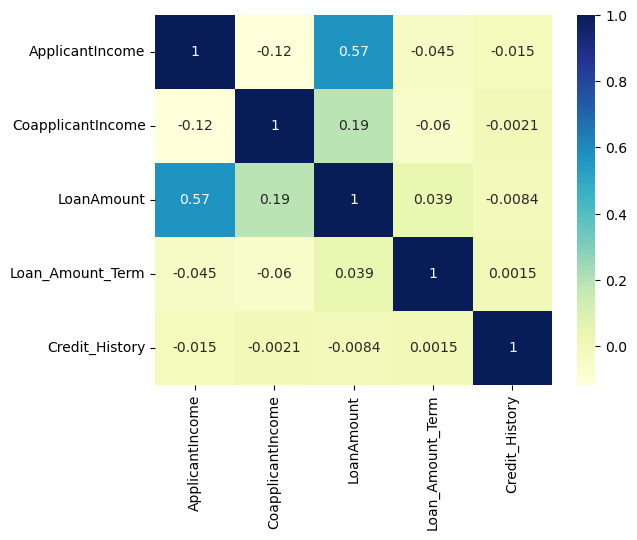

In [25]:
# plotting a correlation heatmap
dataplot = sns.heatmap(train_data.corr(), cmap="YlGnBu", annot=True)
 
# displaying heatmap
plt.show()

In [26]:
cols = train_data.columns
cols

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [27]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Loan_Status','Loan_Amount_Term']

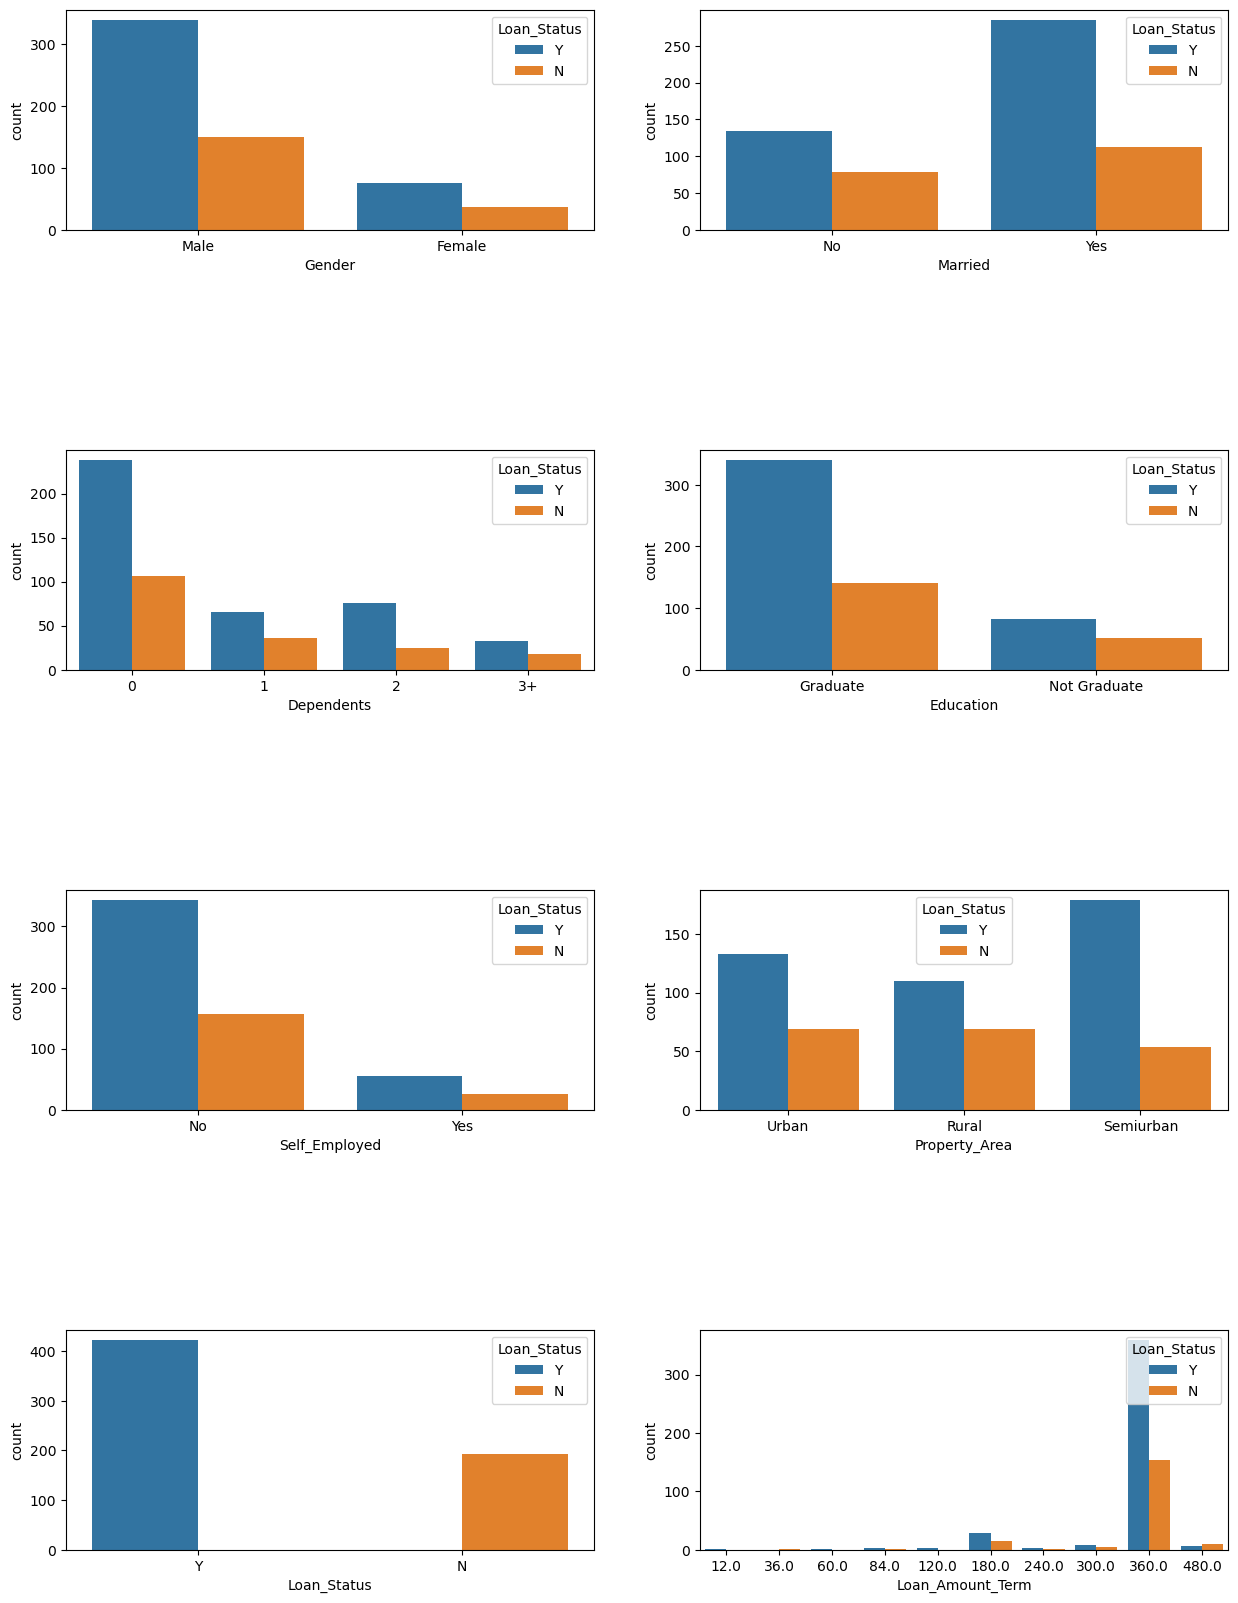

In [28]:
fig,axes = plt.subplots(4,2,figsize=(15,20))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train_data,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

#### Plots above convey following things about the dataset:
1.The majority of loan applicants (about 2/3rd) were approved for a loan.

2.The dataset contains a higher proportion of male applicants compared to female applicants (approximately 3 times more), which could potentially lead to inaccurate predictions and it may be better to remove this variable from the analysis.

3.The majority of the population in the dataset is married (2/3rd) and married applicants are more likely to be approved for a loan.

4.The majority of the population in the dataset have no dependents and these applicants are more likely to be approved for a loan.

5.The majority of the population in the dataset (about 5/6th) are graduates and graduates have a higher proportion of loan approvals.

6.The majority of the population in the dataset (about 5/6th) are not self-employed.

7.The majority of applicants in the dataset are from semi-urban areas and these applicants are more likely to be approved for a loan.

8.Applicants with a credit history are far more likely to be approved for a loan.

9.The majority of the loans taken out are for 360 months (30 years).

Now, let's also analyze Numerical Columns:

In [29]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000


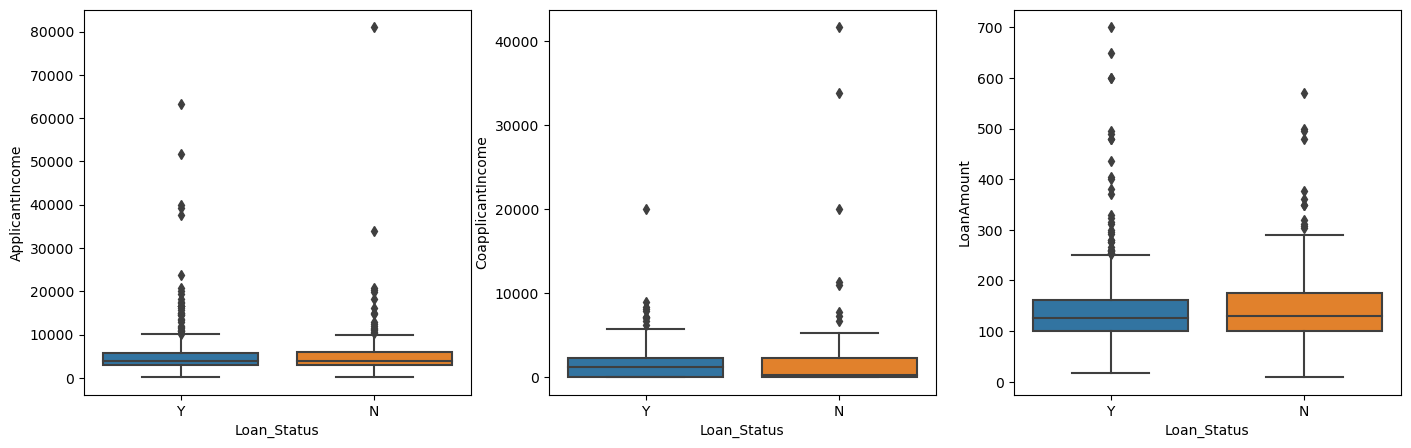

In [30]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,num_col in enumerate(numerical_columns):
    sns.boxplot(y=num_col,data=train_data,x='Loan_Status',ax=axes[idx])

print(train_data[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

For Numercical Columns, there is no significant relation to Loan approval status.

### Preprocessing Data:
1. Encoding Categorical Features.
2. Imputing missing values

In [31]:
train_data["Loan_Status"] = train_data["Loan_Status"].map({"Y" : 1, "N" : 0})

In [32]:
train_data["Loan_Status"].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [33]:
xtr = train_data.drop(["Loan_ID","Loan_Status","Gender"],axis=1)
xte = test_data.drop(["Loan_ID","Gender"],axis=1)

In [34]:
ytr = train_data[["Loan_Status"]]

In [35]:
cat_cols = [col for col in xtr.columns if xtr.dtypes[col]=="object"]
cat_cols

['Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

In [36]:
num_cols = [col for col in xtr.columns if xtr.dtypes[col] !="object"]
num_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [37]:
xtr_cat = xtr[cat_cols]
xtr_num = xtr[num_cols]
xte_cat = xte[cat_cols]
xte_num = xte[num_cols]

### Null value imputation

In [38]:
from sklearn.impute import SimpleImputer
cat_impu=SimpleImputer(strategy="most_frequent")
num_impu=SimpleImputer(strategy="median" )
xtr_cat=pd.DataFrame(cat_impu.fit_transform(xtr_cat),columns=cat_cols)
xte_cat=pd.DataFrame(cat_impu.fit_transform(xte_cat),columns=cat_cols)
xtr_num=pd.DataFrame(num_impu.fit_transform(xtr_num),columns=num_cols)
xte_num=pd.DataFrame(num_impu.fit_transform(xte_num),columns=num_cols)

In [39]:
# Function to convert all object columns to categorical
xtr_cat[cat_cols]=xtr_cat[cat_cols].astype("category")
xte_cat[cat_cols]=xte_cat[cat_cols].astype("category")

## Encode Categorical Value


In [40]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [41]:
for col in cat_cols:
    xtr_cat[col]=encoder.fit_transform(xtr_cat[col])
    xte_cat[col]=encoder.fit_transform(xte_cat[col])

In [42]:
xtr_cat.head()

,Married,Dependents,Education,Self_Employed,Property_Area
0,0,0,0,0,2
1,1,1,0,0,0
2,1,0,0,1,2
3,1,0,1,0,2
4,0,0,0,0,2


In [43]:
train_data.shape

(614, 13)

In [44]:
xtr=pd.concat([xtr_num,xtr_cat],axis=1)

In [45]:
xte=pd.concat([xte_num,xte_cat],axis=1)

In [46]:
xte.shape

(367, 10)

In [47]:
xtr.shape

(614, 10)

In [48]:
columnsxtr = xtr.columns
columnsxtr

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Married', 'Dependents',
       'Education', 'Self_Employed', 'Property_Area'],
      dtype='object')

In [49]:
columnsxte = xte.columns
columnsxte

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Married', 'Dependents',
       'Education', 'Self_Employed', 'Property_Area'],
      dtype='object')

# Scale Numeric Data

In [50]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(xtr)

StandardScaler()

In [51]:
xtr = pd.DataFrame(scale.transform(xtr),columns=columnsxtr)

In [52]:
xtr.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
dtype: int64

In [53]:
xte.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
dtype: int64

In [54]:
xte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    367 non-null    float64
 1   CoapplicantIncome  367 non-null    float64
 2   LoanAmount         367 non-null    float64
 3   Loan_Amount_Term   367 non-null    float64
 4   Credit_History     367 non-null    float64
 5   Married            367 non-null    int32  
 6   Dependents         367 non-null    int32  
 7   Education          367 non-null    int32  
 8   Self_Employed      367 non-null    int32  
 9   Property_Area      367 non-null    int32  
dtypes: float64(5), int32(5)
memory usage: 21.6 KB


In [55]:
xte = pd.DataFrame(scale.transform(xte),columns=columnsxte)

In [56]:
xte.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married,Dependents,Education,Self_Employed,Property_Area
0,0.051857,-0.554487,-0.425428,0.273231,0.411733,0.728816,-0.737806,-0.528362,-0.392601,1.223298
1,-0.381297,-0.041468,-0.235040,0.273231,0.411733,0.728816,0.253470,-0.528362,-0.392601,1.223298
2,-0.066097,0.061136,0.740701,0.273231,0.411733,0.728816,1.244745,-0.528362,-0.392601,1.223298
3,-0.501872,0.316278,-0.544421,0.273231,0.411733,0.728816,1.244745,-0.528362,-0.392601,1.223298
4,-0.348532,-0.554487,-0.806205,0.273231,0.411733,-1.372089,-0.737806,1.892641,-0.392601,1.223298


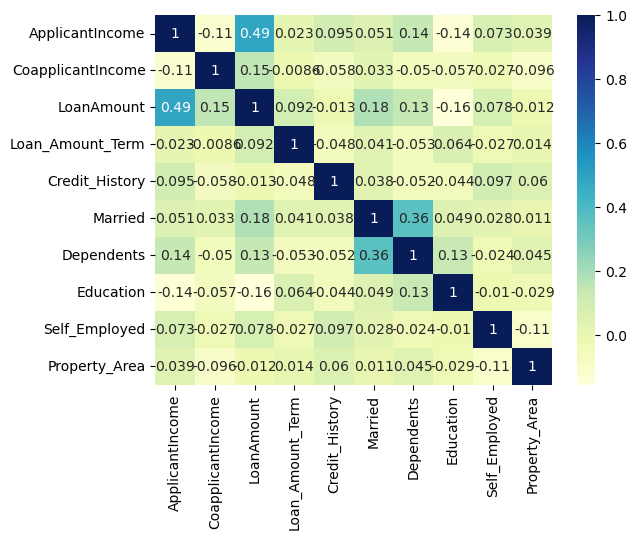

In [81]:
# plotting a correlation heatmap
dataplot = sns.heatmap(xte.corr(), cmap="YlGnBu", annot=True)
 
# displaying heatmap
plt.show()

## Split Dataset for Training and Testing

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(xtr,ytr,test_size=0.25,random_state=142)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(460, 10)
(154, 10)
(460, 1)
(154, 1)


## Model Building


In [59]:

def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score 
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    #


    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1,  'cm': cm}

## Decision Tree

### Building Model

In [60]:
from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=42)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

### Model Evaluation

In [61]:
# Evaluate Model
dtc_eval = evaluate_model(dtc, x_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.7207792207792207
Precision: 0.819047619047619
Recall: 0.7818181818181819
F1 Score: 0.7999999999999999
Confusion Matrix:
 [[25 19]
 [24 86]]


## Random Forest

### Building Model

In [62]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

C:\Users\Aparna.DESKTOP-R4D5RJ8\AppData\Local\Temp\ipykernel_9996\2938708906.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

### Model Evaluation

In [63]:
# Evaluate Model
rf_eval = evaluate_model(rf, x_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Confusion Matrix:\n', rf_eval['cm'])

Accuracy: 0.7987012987012987
Precision: 0.816
Recall: 0.9272727272727272
F1 Score: 0.8680851063829788
Confusion Matrix:
 [[ 21  23]
 [  8 102]]


## K-Nearest Neighbors

### Building Model

In [64]:
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model 
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

C:\Users\Aparna.DESKTOP-R4D5RJ8\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

### Model Evaluation

In [65]:
# Evaluate Model
knn_eval = evaluate_model(knn, x_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.8051948051948052
Precision: 0.8125
Recall: 0.9454545454545454
F1 Score: 0.8739495798319329
Confusion Matrix:
 [[ 20  24]
 [  6 104]]


C:\Users\Aparna.DESKTOP-R4D5RJ8\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## model comparison

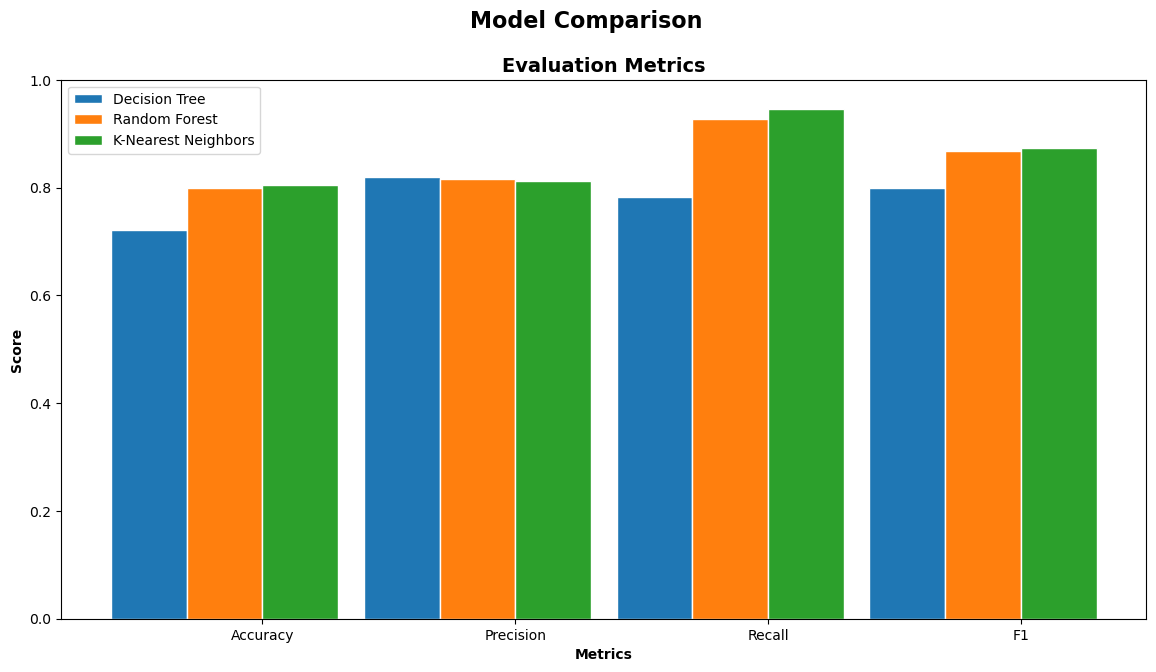

In [66]:
# Intitialize figure with two plots
fig, (ax1) = plt.subplots(1)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.3
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

plt.show()

From the figures above we can see that our knn model tops the other models in 3 of the 4 metrics we evaluate, except precision. 
So we can assume that knn is the right choice to solve our problem.

In [67]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [50, 80, 100],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 300, 500]
}

# Create a base model
rf_grids = RandomForestClassifier(random_state=0)

# Initiate the grid search model
grid_search = GridSearchCV(estimator=rf_grids, param_grid=param_grid, scoring='recall',
                           cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

grid_search.best_params_

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


C:\Users\Aparna.DESKTOP-R4D5RJ8\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'max_depth': 50,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

In [68]:
# Select best model with best fit
best_grid = grid_search.best_estimator_

# Evaluate Model
best_grid_eval = evaluate_model(best_grid, x_test, y_test)

# Print result
print('Accuracy:', best_grid_eval['acc'])
print('Precision:', best_grid_eval['prec'])
print('Recall:', best_grid_eval['rec'])
print('F1 Score:', best_grid_eval['f1'])
print('Confusion Matrix:\n', best_grid_eval['cm'])

Accuracy: 0.8311688311688312
Precision: 0.8181818181818182
Recall: 0.9818181818181818
F1 Score: 0.8925619834710744
Confusion Matrix:
 [[ 20  24]
 [  2 108]]


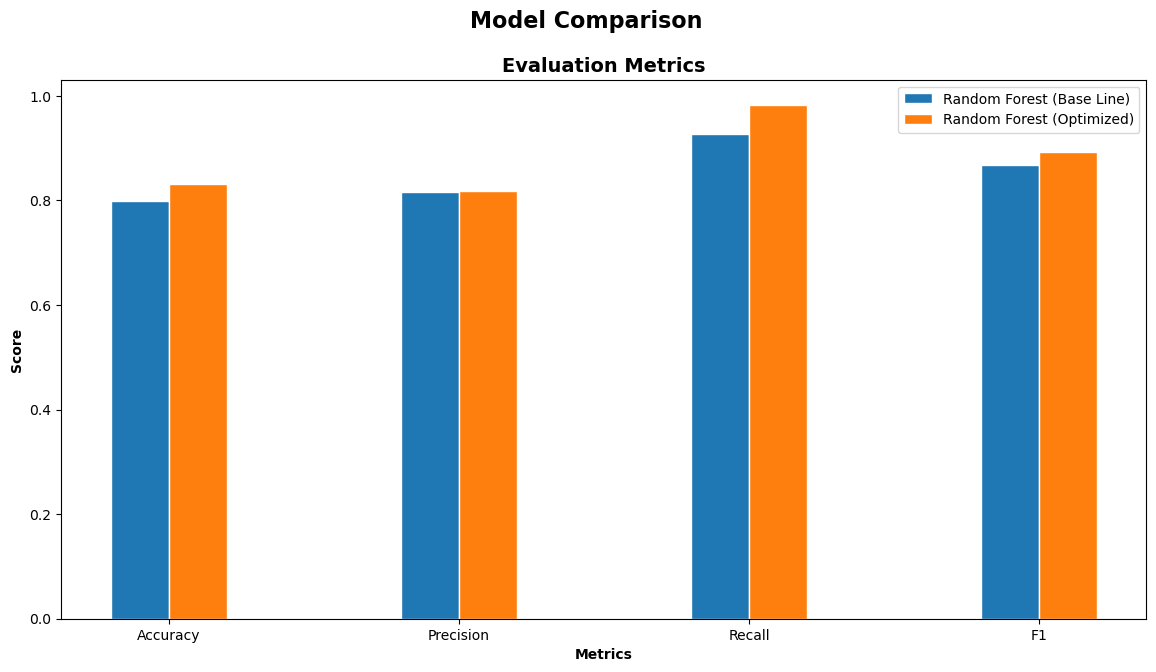

Change of 4.07% on accuracy.
Change of 0.27% on precision.
Change of 5.88% on recall.
Change of 2.82% on F1 score.


In [69]:
# Intitialize figure with two plots
fig, (ax1) = plt.subplots(1)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1']]
best_grid_score = [best_grid_eval['acc'], best_grid_eval['prec'], best_grid_eval['rec'], best_grid_eval['f1']]

## Set position of bar on X axis
r1 = np.arange(len(rf_score))
r2 = [x + barWidth for x in r1]

## Make the plot
ax1.bar(r1, rf_score, width=barWidth, edgecolor='white', label='Random Forest (Base Line)')
ax1.bar(r2, best_grid_score, width=barWidth, edgecolor='white', label='Random Forest (Optimized)')

## Add xticks on the middle of the group bars
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax1.set_xticks([r + (barWidth * 0.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
# ax1.set_ylim(0, 1)

## Create legend & Show graphic
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

plt.show()

print('Change of {:0.2f}% on accuracy.'.format(100 * ((best_grid_eval['acc'] - rf_eval['acc']) / rf_eval['acc'])))
print('Change of {:0.2f}% on precision.'.format(100 * ((best_grid_eval['prec'] - rf_eval['prec']) / rf_eval['prec'])))
print('Change of {:0.2f}% on recall.'.format(100 * ((best_grid_eval['rec'] - rf_eval['rec']) / rf_eval['rec'])))
print('Change of {:0.2f}% on F1 score.'.format(100 * ((best_grid_eval['f1'] - rf_eval['f1']) / rf_eval['f1'])))

The result show that our optimised performed little bit better than the original model. The optimised models show an increase in 3 out of the 4 metrics but perform worse in the other metrics.

## Predictions for given test data

In [70]:
from sklearn.metrics import accuracy_score
predictions = best_grid.predict(xte)
Target = pd.DataFrame(predictions,columns=['Loan_Status'])

In [71]:
Loan_ID =pd.DataFrame(test_data1.Loan_ID)

In [72]:
pred=pd.concat([Loan_ID,Target],axis=1)

In [73]:
pred.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [74]:
pred.to_csv('Submission1.csv',index=False)

In [75]:
submission=pd.read_csv("Submission1.csv")

In [76]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [77]:
submission["Loan_Status"].value_counts()

1    308
0     59
Name: Loan_Status, dtype: int64

In [78]:
submission = submission.replace({'Loan_Status': {0: 'N', 1 : 'Y'}})

In [79]:
submission

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [80]:
submission.to_csv('Submissiongrid.csv',index=False)